## Definição do Problema

A Ciência de Dados está em todos os lugares. Se há dados disponíveis, podemos extrair, analisar e gerar insights poderosos. E no esporte não seria diferente.

Cada vez mais gestores de todos os esportes descobrem os benefícios e vantagem competitiva em usar análise de dados para compreender o comportamento dos atletas, melhorar o desempenho, unir atletas com características complementares no mesmo time e muito mais.

Neste Lab, vamos extrair dados reais de atletas da NBA - a Liga de Basquete Norte Americana - e analisar os dados.

## Fonte de Dados

Nossa fonte de dados será o site <a href="https://www.basketball-reference.com">Bastketball Reference</a> que mantém todos os detalhes e estatísticas sobre a NBA.

## Carregando os Pacotes Usados Neste Jupyter Notebook

In [1]:
# Imports para Web Scraping
import bs4
import csv 
import requests 
from bs4 import BeautifulSoup

# Imports para manipulação, visualização e análise de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

## Web Scraping

In [ ]:
# Criamos um arquivo para salvar o resultado do web scraping
arquivo = csv.writer(open('dados/nba.csv', 'w', encoding = "utf-8")) 

In [ ]:
# Fazemos requisição à página web com os dados do nosso interesse, nesse caso temporada 2019/2020
pagina = requests.get("https://www.basketball-reference.com/leagues/NBA_2020_per_game.html")

In [ ]:
# Requisição 200 indica sucesso na conexão, enquanto a requisição 400 indica falha na conexão.
pagina

Visualizamos o conteúdo da pagina:

In [ ]:
# Visualiza os dados
pagina.text[:5000]

In [ ]:
# Vamos fazer o parser na página HTML para formatar o texto
soup = BeautifulSoup(pagina.text, 'html.parser')

In [ ]:
# Visualiza o documento agora no padrão HTML (código fonte da página)
soup

Mas os dados que nos interessam estão em uma tag div, class do tipo table_container. Vamos pesquisar e então extrair os dados.

In [ ]:
# Busca pelo tag e classe na página HTML
tabela = soup.find("div", {"class": "overthrow table_container"})

In [ ]:
# Visualiza os dados
tabela

Estamos quase lá. Na tabela, buscamos pelo termo thead a fim de extrair a "cabeça" da tabela, ou seja, o cabeçalho.

In [ ]:
# Extrai o cabeçalho da tabela (título de cada coluna) e gravamos no arquivo
header = tabela.find("thead")
header_elements = header.find_all("th")
header_elements = [head.text for head in header_elements[1:]]
arquivo.writerow(header_elements)

In [ ]:
# Visualiza os dados
header

Podemos então extrair os elementos de cada linha. Buscamos pela tag tr e class full_tabel.

In [ ]:
# Extrai elementos de cada linha da tabela
elementos_linha = tabela.find_all("tr", {"class": "full_table"})

In [ ]:
# Temos agora cada tag tr, que indicam linhas da tabela
elementos_linha

In [ ]:
# Extraímos o conteúdo de cada linha e gravamos no arquivo em disco
for row in elementos_linha:
    data_elements = row.find_all("td")
    data_elements = [data.text for data in data_elements]
    arquivo.writerow(data_elements)

Web Scraping concluído. Vamos analisar os dados.

## Carregando e Analisando os Dados

In [2]:
# Carrega o arquivo csv com o conteúdo do web scraping
df_nba = pd.read_csv('dados/nba.csv')

In [3]:
# Shape
df_nba.shape

(529, 29)

In [4]:
# Visualiza uma amostra dos dados
df_nba.sample(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
170,Rudy Gay,PF,33,SAS,67,5,21.8,4.0,8.9,0.446,...,0.882,0.9,4.5,5.4,1.7,0.5,0.5,1.3,1.5,10.8
117,Jae Crowder,SF,29,TOT,65,53,28.8,3.5,8.7,0.401,...,0.776,0.8,5.1,5.9,2.5,1.1,0.4,1.1,2.2,10.5
189,Blake Griffin,PF,30,DET,18,18,28.4,4.9,13.9,0.352,...,0.776,0.9,3.7,4.7,3.3,0.4,0.4,2.2,1.5,15.5
394,Justin Patton,C,22,OKC,5,0,4.8,0.8,2.0,0.400,...,NaN,0.2,0.8,1.0,0.4,0.0,0.0,0.4,0.8,1.8
273,Maxi Kleber,C,28,DAL,74,21,25.5,3.2,6.9,0.461,...,0.849,1.5,3.7,5.2,1.2,0.3,1.1,0.8,2.4,9.1
56,Brian Bowen,SG,21,IND,6,1,5.2,0.5,1.7,0.300,...,NaN,0.2,1.0,1.2,0.0,0.0,0.2,0.2,0.5,1.0
431,Terry Rozier,PG,25,CHO,63,63,34.3,6.3,14.9,0.423,...,0.874,0.8,3.6,4.4,4.1,1.0,0.2,2.2,2.0,18.0
69,Bruce Brown,SG,23,DET,58,43,28.2,3.4,7.7,0.443,...,0.739,1.1,3.7,4.7,4.0,1.1,0.5,1.7,2.8,8.9
236,Andre Iguodala,SG,36,MIA,21,0,19.9,1.8,4.2,0.432,...,0.400,0.8,2.9,3.7,2.4,0.7,1.0,1.2,1.7,4.6
83,Devontae Cacok,C,23,LAL,1,0,9.0,3.0,6.0,0.500,...,NaN,2.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,6.0


**Dicionário de Dados** (conforme mostrado na fonte de dados):

- Rk -- Rank
- Pos -- Position
- Age -- Player's age on February 1 of the season
- Tm -- Team
- G -- Games
- GS -- Games Started
- MP -- Minutes Played Per Game
- FG -- Field Goals Per Game
- FGA -- Field Goal Attempts Per Game
- FG% -- Field Goal Percentage
- 3P -- 3-Point Field Goals Per Game
- 3PA -- 3-Point Field Goal Attempts Per Game
- 3P% -- 3-Point Field Goal Percentage
- 2P -- 2-Point Field Goals Per Game
- 2PA -- 2-Point Field Goal Attempts Per Game
- 2P% -- 2-Point Field Goal Percentage
- eFG% -- Effective Field Goal Percentage

This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

- FT -- Free Throws Per Game
- FTA -- Free Throw Attempts Per Game
- FT% -- Free Throw Percentage
- ORB -- Offensive Rebounds Per Game
- DRB -- Defensive Rebounds Per Game
- TRB -- Total Rebounds Per Game
- AST -- Assists Per Game
- STL -- Steals Per Game
- BLK -- Blocks Per Game
- TOV -- Turnovers Per Game
- PF -- Personal Fouls Per Game
- PTS -- Points Per Game

### Qual a idade média dos jogadores que disputaram a temporada 2019/2020 da NBA?

In [5]:
# Idade média dos jogadores
df_nba['Age'].mean()

25.561436672967865

A idade média foi de 25 anos. Vamos criar um histograma e analisar a distribuição da variável idade.

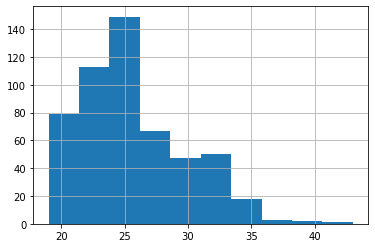

In [6]:
# Histograma
df_nba['Age'].hist()

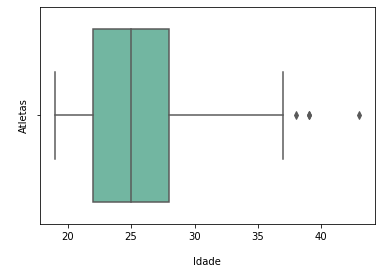

In [7]:
# BoxPlot
ax = sns.boxplot(x = df_nba['Age'], palette = "Set2", orient = "h")
plt.ylabel('\nAtletas')
plt.xlabel('\nIdade')
plt.show()

Claramente a idade média dos atletas é de 25 anos. E perceba que temos alguns outliers. Será que a variável idade segue uma distribuição normal? Vamos checar.

In [8]:
# Teste de normalidade com Pingouin
x = df_nba['Age']
pg.normality(x)

,W,pval,normal
Age,0.948836,1.474959e-12,False


### Quais são os jogadores com maior número de pontos por jogo? Selecione os Top 10.

In [9]:
# Agrupando os dados por jogador e total de pontos
df_nba_top10 = df_nba.groupby(['Player'])['PTS'].sum().reset_index().rename(columns = {'PTS': 'Total_Pontos'})

In [10]:
# Retornamos os Top 10
df_nba_top10 = df_nba_top10.nlargest(10, 'Total_Pontos')

In [11]:
# Visualiza os dados
df_nba_top10

,Player,Total_Pontos
220,James Harden,34.3
42,Bradley Beal,30.5
91,Damian Lillard,30.0
488,Trae Young,29.6
178,Giannis Antetokounmpo,29.5
334,Luka Dončić,28.8
320,Kyrie Irving,27.4
438,Russell Westbrook,27.2
289,Kawhi Leonard,27.1
125,Devin Booker,26.6


### Quantos jogos os jogadores com 35 anos de idade ou mais iniciaram (variável GS)?

In [12]:
# Função
def lista_jogadores35():
    print('\nJogadores com 35 ou mais anos de idade e jogos disputados.\n')
    print('Jogador:          | Jogos:')
    print('------------------+--------')
    for index, row in df_nba.iterrows():
        if row['Age'] >= 35:
            print('{:<17} | {:>6}'.format(row['Player'], row['GS']))

In [13]:
# Executa a função
lista_jogadores35()


Jogadores com 35 ou mais anos de idade e jogos disputados.

Jogador:          | Jogos:
------------------+--------
Carmelo Anthony   |     58
J.J. Barea        |      6
Vince Carter      |      0
Tyson Chandler    |      5
Jamal Crawford    |      0
Marc Gasol        |     43
Udonis Haslem     |      1
Andre Iguodala    |      0
LeBron James      |     67
Kyle Korver       |      1
J.J. Redick       |     36
Thabo Sefolosha   |      0


### Gráfico que mostra a relação entre rebotes ofensivos e minutos jogados. 

O que podemos concluir a partir do gráfico?

In [14]:
# Função
def gera_grafico_reb_ofensivos():
    plt.figure(figsize = [10,10])
    sns.set()
    sns.regplot(x = df_nba['MP'], y = df_nba['ORB'], color = '#AA2F2F', marker = '+')
    plt.xlabel('\nMinutos Jogados (por jogo)\n', fontsize = 14, color = 'black')
    plt.ylabel('\nRebotes Ofensivos (por jogo)\n', fontsize = 14, color = 'black')
    plt.title('\nMinutos Jogados x Rebotes Ofensivos\n', fontsize = 20)
    plt.show()

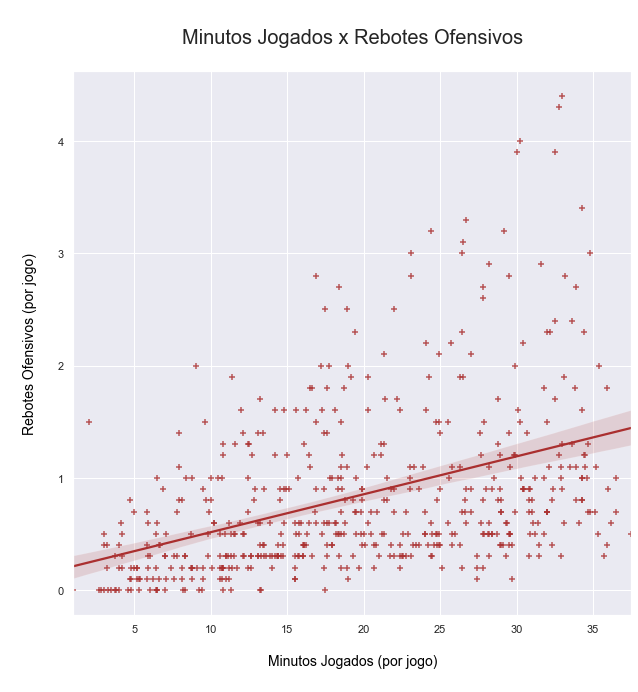

In [15]:
# Executa a função
gera_grafico_reb_ofensivos()

Aumenta a dispersão dos dados à media que aumenta o número de minutos jogados. Ou seja, com os jogadores mais cansados ao final do jogo é mais difícil fazer rebotes ofensivos.

### Gráfico que mostra a relação entre rebotes defensivos e minutos jogados. 

O que podemos concluir a partir do gráfico?

In [16]:
# Função
def gera_grafico_reb_defensivos():
    plt.figure(figsize = [10,10])
    sns.set()
    sns.regplot(x = df_nba['MP'], y = df_nba['DRB'], color = '#F244AA', marker = '*')
    plt.xlabel('\nMinutos Jogados (por jogo)\n', fontsize = 14, color = 'black')
    plt.ylabel('\nRebotes Defensivos (por jogo)\n', fontsize = 14, color = 'black')
    plt.title('\nMinutos Jogados x Rebotes Defensivos\n', fontsize = 20)
    plt.show()

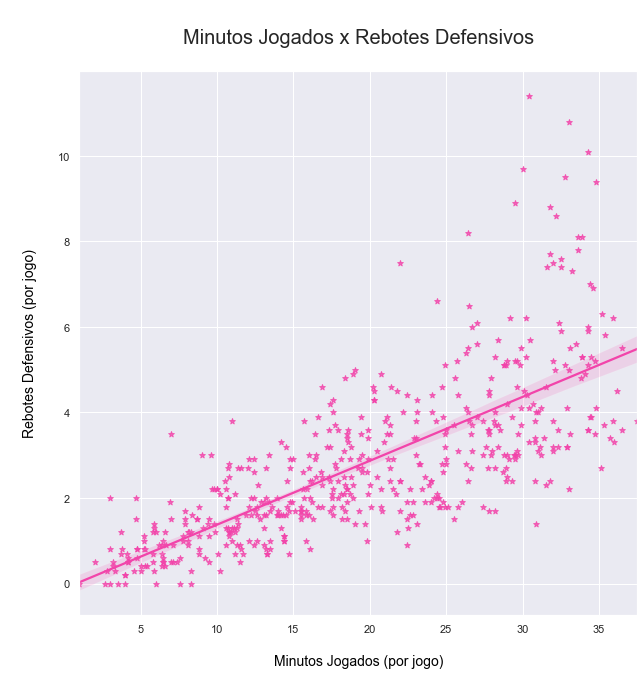

In [17]:
# Executa a função
gera_grafico_reb_defensivos()

O comportamento dos rebotes desensivos segue um padrão diferente dos rebotes ofensivos. Mais ao final do jogo, as equipes itensificam suas defesas e consequentemente aumenta o número de rebotes defensivos.

A abundância de dados disponíveis na NBA permite realizar uma infinidade de análises de todos os tipos, sendo o scrap inicial um ponto de partida para uma infinidade de novas análises.